In [1]:
import fsc
from fsc.devices import w7x

In [2]:
fsc.resolve.importOfflineData("C:\\Users\\Alexander\\Downloads\\w7x.fsc")

In [3]:
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32
grid

(rMin = 4, rMax = 7, zMin = -1.5, zMax = 1.5, nSym = 5, nR = 128, nZ = 128, nPhi = 32)

In [8]:
tracer = fsc.tracer()
help(tracer)

Help on FLT in module fsc.flt object:

class FLT(builtins.object)
 |  FLT(backend)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, backend)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  computeField(self, *args, **kwargs)
 |  
 |  computeFieldAsync(self, config, grid)
 |      Returns an array of shape [3, grid.nPhi, grid.nZ, grid.nR] containing the magnetic field.
 |      The directions along the first coordinate are phi, z, r
 |  
 |  poincareInPhiPlanes(self, *args, **kwargs)
 |  
 |  poincareInPhiPlanesAsync(self, points, phiValues, nTurns, config, grid, distanceLimit=10000.0, stepSize=0.001)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data

In [5]:
cadCoils = w7x.computeCoilFields(tracer.calculator, w7x.cadCoils(), grid = grid)

Main 0
Main 1
Main 2
Main 3
Main 4
Main 5
Main 6
Trim 0
Trim 1
Trim 2
Trim 3
Trim 4
CC 0
CC 1
CC 2
CC 3
CC 4
CC 5
CC 6
CC 7
CC 8
CC 9


In [6]:
fsc.data.writeArchive(cadCoils, "cadCoils.fsc").wait()

In [5]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc").wait()

In [6]:
config = w7x.standard(coils = archiveCoils)
#config = w7x.standard()

In [7]:
config.ptree()

┐
└── w7xMagneticConfig
    └── coilsAndCurrents
        ├── nonplanar
        │   ├── 0: 15000.0
        │   ├── 1: 15000.0
        │   ├── 2: 15000.0
        │   ├── 3: 15000.0
        │   └── 4: 15000.0
        ├── planar
        │   ├── 0: 0.0
        │   └── 1: 0.0
        ├── trim
        │   ├── 0: 0.0
        │   ├── 1: 0.0
        │   ├── 2: 0.0
        │   ├── 3: 0.0
        │   └── 4: 0.0
        ├── control
        │   ├── 0: 0.0
        │   └── 1: 0.0
        └── coils
            └── fields
                ├── mainFields
                │   ├── 0
                │   │   └── computedField
                │   │       ├── grid
                │   │       │   ├── rMin: 4.0
                │   │       │   ├── rMax: 7.0
                │   │       │   ├── zMin: -1.5
                │   │       │   ├── zMax: 1.5
                │   │       │   ├── nSym: 5
                │   │       │   ├── nR: 128
                │   │       │   ├── nZ: 128
                │   │       │   └── n

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
bPhi, bZ, bR = tracer.computeField(config, grid)

Grid: (rMin = 4, rMax = 7, zMin = -1.5, zMax = 1.5, nSym = 5, nR = 128, nZ = 128, nPhi = 32)


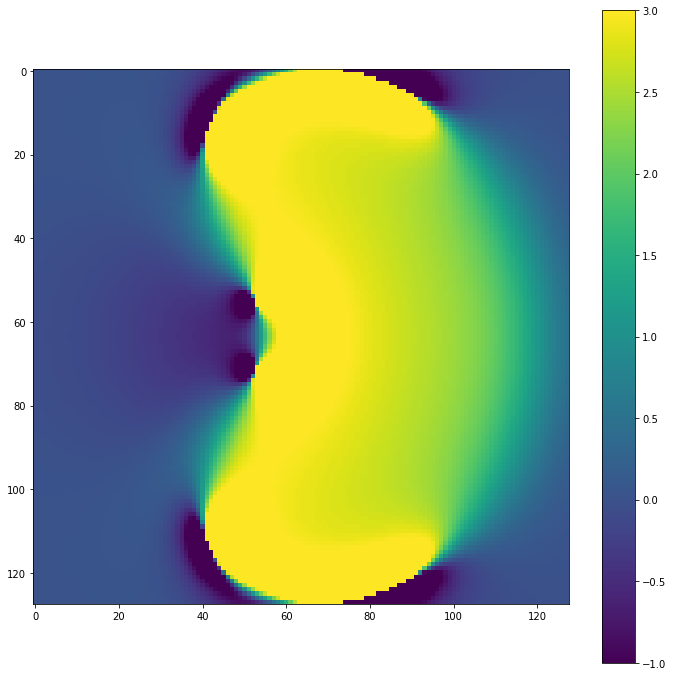

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(bPhi[0], vmin = -1, vmax = 3)
plt.colorbar()

In [13]:
points = np.asarray([5.71, 0.0, 0.0])
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 2000, config, grid, distanceLimit = 3e5, stepSize = 1e-2)

(5.449509811401367, 6.2366331100463865, -0.9619676798582077, 0.962045106291771)

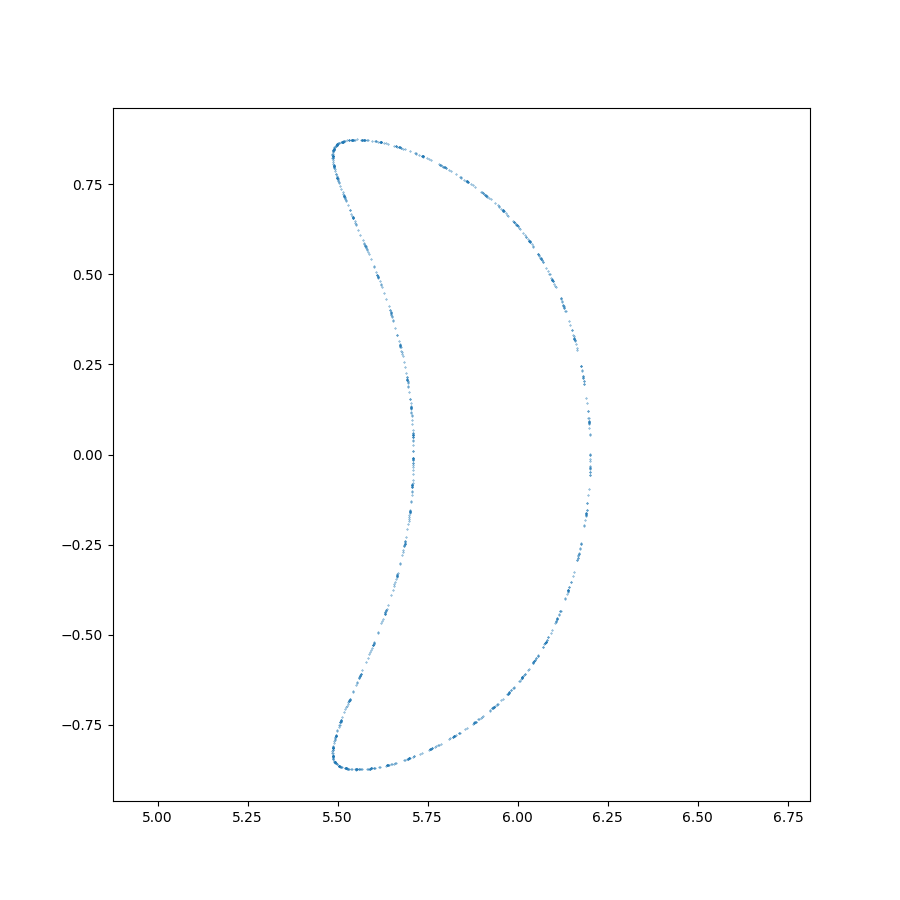

In [14]:
%matplotlib widget
plt.figure(figsize=(9,9))
x, y, z = pcPoints.reshape([3, -1])[:,:1000]
plt.scatter(x, z, s = 0.1)
plt.axis('equal')

In [16]:
x

array([5.6997185, 5.696279 , 5.681714 , 5.642682 , 5.5795684, 5.5194135,
       5.481812 , 5.4630756, 5.4548974, 5.4521937, 5.4530015, 5.457389 ,
       5.46743  , 5.4876924, 5.526332 , 5.5935087, 5.692914 , 5.8067374,
       5.9021187, 5.9650245, 6.001634 , 6.0230646, 6.037805 , 6.0519753,
       6.0711164, 6.1005106, 6.1424356, 6.1859736, 6.2047825, 6.1837735,
       6.1396985, 6.098397 , 6.0697474, 6.0510707, 6.037028 , 6.022088 ,
       6.000046 , 5.962242 , 5.89754  , 5.8004494, 5.6865463, 5.588751 ,
       5.523442 , 5.486142 , 5.466718 , 5.4572387, 5.4533486, 5.453313 ,
       5.457493 , 5.468736 , 5.493551 , 5.540233 , 5.6053104, 5.6612325,
       5.689489 , 5.698335 , 5.7000165, 5.700057 , 5.700045 , 5.7000747,
       5.6989446, 5.6921334, 5.6684656, 5.617106 , 5.5513196, 5.500266 ,
       5.4719405, 5.458705 , 5.453398 , 5.452448 , 5.455018 , 5.4621077,
       5.47701  , 5.5063314, 5.559742 , 5.64545  , 5.7567925, 5.863655 ,
       5.940986 , 5.9879932, 6.0150995, 6.032207 , 

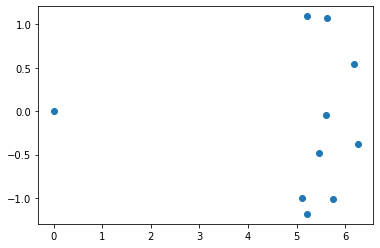

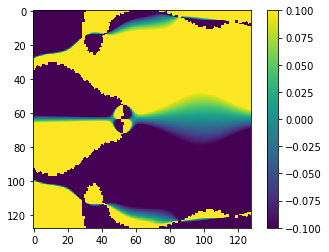

In [16]:
plt.imshow((bR / bPhi)[0], vmin = -0.1, vmax = 0.1)
plt.colorbar()

In [13]:
0.5**2 + 0.8**2 + 0.3**2

0.9800000000000001